In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib.colors import ListedColormap

colors = {
    'main': '#CFD923',
    'second': '#EB5D18',
    'extra': '#E0E0E0'
}

brunoyam_cmap = ListedColormap([colors['main'], colors['second'], colors['extra']])

plt.rcParams.update({'font.family':'Closer'})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
x = data.data
y = data.target

x = (x - x.mean()) / x.std()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.975
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  2  0  0  0  1 35  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x_train, y_train)

array([0.98611111, 0.99305556, 0.9825784 , 0.97560976, 0.98606272])

In [6]:
from sklearn.datasets import load_digits
data = load_digits()
x = data.data
y = data.target
x = (x - x.min()) / (x.max() - x.min())
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB # Для бинарной классификации, не наш случай
from sklearn.naive_bayes import MultinomialNB # Для многоклассовой классификации, наш случай

model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9083333333333333
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 25  6  0  0  1  0  0  0  3]
 [ 1  2 31  0  0  0  0  1  0  1]
 [ 0  0  1 26  0  0  0  0  1  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  0  6]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  0  0  0  0  1 35  0]
 [ 0  0  0  0  0  0  0  3  1 37]]


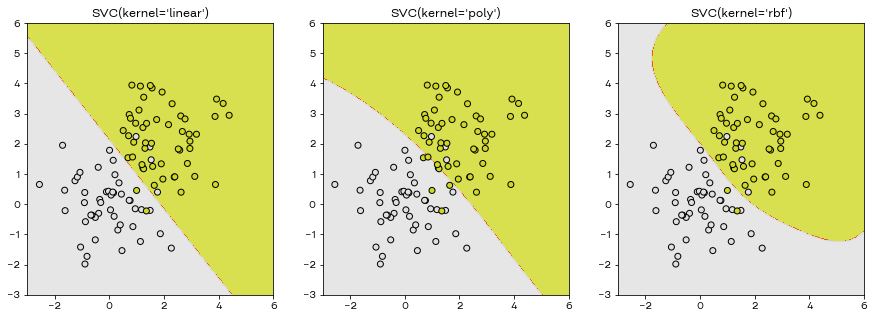

In [8]:
from sklearn.svm import SVC
np.random.seed(0)

model1 = SVC(kernel='linear')
model2 = SVC(kernel='poly')
model3 = SVC(kernel='rbf')

n = 100
x1 = np.random.normal(loc=0, scale=1, size=(n // 2, 2))
x2 = np.random.normal(loc=2, scale=1, size=(n // 2, 2))
x = np.vstack((x1, x2))
y1 = np.ones(n // 2)
y2 = np.zeros(n // 2)
y = np.hstack((y1, y2))



x1_plot = np.linspace(-3, 6, 300)
x2_plot = np.linspace(-3, 6, 300)
x1_mesh, x2_mesh = np.meshgrid(x1_plot, x2_plot)
x_plot = np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for model, ax_ in zip([model1, model2, model3], ax):
    model.fit(x, y)
    res = model.predict(x_plot).reshape(x1_mesh.shape)
    ax_.contourf(x1_mesh, x2_mesh, res, alpha=0.8, cmap=brunoyam_cmap)
    ax_.scatter(x[:, 0], x[:, 1], c=y, edgecolor='black', cmap=brunoyam_cmap)
    ax_.set_title(f"SVC(kernel='{model.kernel}')")
fig.savefig('../images/svm_example.png')

In [11]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9916666666666667
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=3, random_state=0, splitter='best', min_samples_split=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8583333333333333
[[24  0  0  0  0  0  1  0  0  2]
 [ 0 28  1  2  1  1  0  0  1  1]
 [ 1  1 31  1  0  0  0  0  1  1]
 [ 0  0  0 27  0  0  1  1  0  0]
 [ 1  1  0  1 25  0  1  1  0  0]
 [ 0  1  0  0  2 35  0  0  0  2]
 [ 1  0  1  1  0  0 41  0  0  0]
 [ 1  0  0  0  0  1  0 37  0  0]
 [ 0  3  3  4  0  1  0  1 27  0]
 [ 1  0  1  2  0  1  0  0  2 34]]


In [63]:
accuracy_score(y_train, model.predict(x_train))

0.954070981210856

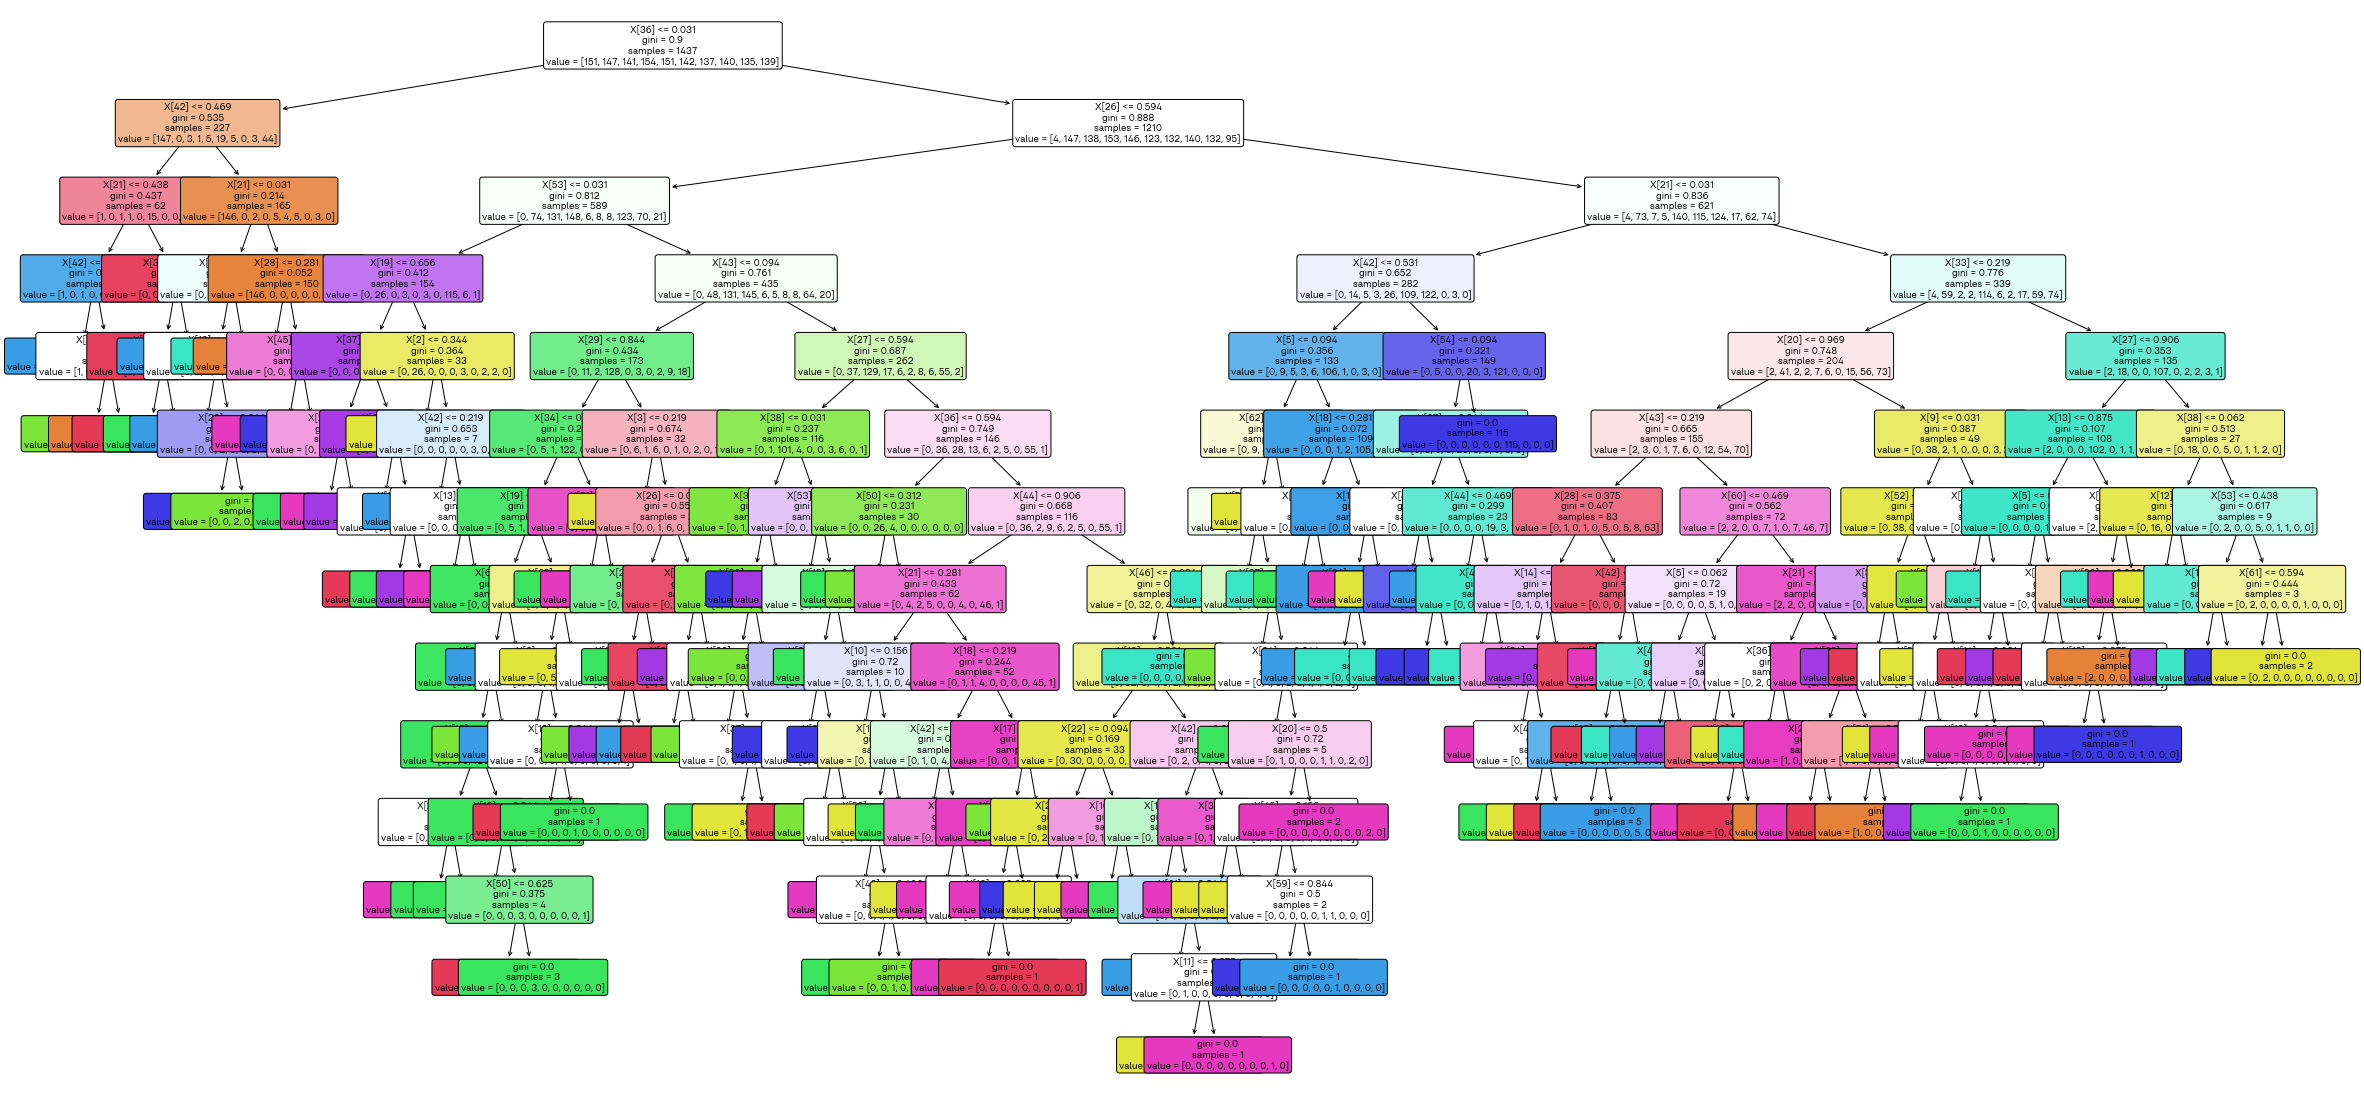

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))  
plot_tree(model,
             filled=True, fontsize=9, rounded = True)
plt.savefig('../images/bad_tree_example.jpg')

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 1  0 34  1  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  1  0 38  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  1  0  0  0  1 36  0]
 [ 0  0  0  1  0  2  0  0  0 38]]


In [126]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9555555555555556
[[26  0  0  0  0  1  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  1]
 [ 2  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  0  0  1  0  0 41  0  2  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  0  1  0  0  0  0 37  0]
 [ 1  0  0  2  0  0  0  0  0 38]]


In [102]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('Tree', DecisionTreeClassifier()),
    ('SVM_1', SVC(kernel='rbf')),
    ('SVM_2', SVC(kernel='poly')),
    ('kNN', KNeighborsClassifier(3))
]
final = LogisticRegression(max_iter=1000)
model=StackingClassifier(estimators=estimators, final_estimator=final) # Теперь можно использовать как модель sklearn
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9833333333333333
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  1 37  0]
 [ 1  0  0  0  0  1  0  0  0 39]]


In [124]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [5, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 100, 150]
}

search = GridSearchCV(RandomForestClassifier(), params)
search.fit(x_train, y_train)
search.best_estimator_

Wall time: 32.7 s


RandomForestClassifier(criterion='entropy', max_depth=150, n_estimators=500)

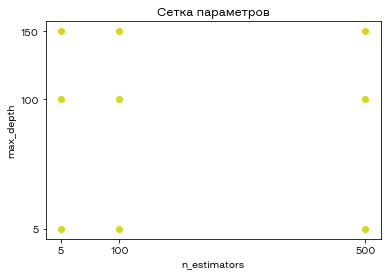

In [121]:
from itertools import product

dots = np.array(list(product(params['n_estimators'], params['max_depth'])))

plt.title('Сетка параметров')
plt.scatter(dots[:, 0], dots[:, 1], c=colors['main'])

plt.xticks(params['n_estimators'])
plt.yticks(params['max_depth'])

plt.xlabel('n_estimators')
plt.ylabel('max_depth')

plt.savefig('../images/grid_example.jpg')

In [123]:
%%time
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(RandomForestClassifier(), params)
search.fit(x_train, y_train)
search.best_estimator_

Wall time: 13 s


RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=500)